# EE16A Homework 13

## Question 2: How Much Is Too Much?

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline
   
"""Function that defines a data matrix for some input data."""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data

"""Function that computes the Least Squares Approximation"""
def leastSquares(D,y): 
    return np.linalg.lstsq(D,y)[0]

"""This function is used for plotting only"""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
                  
np.random.seed(10)

### Part (a)
Some setup code to create our resistor test data points and plot them.

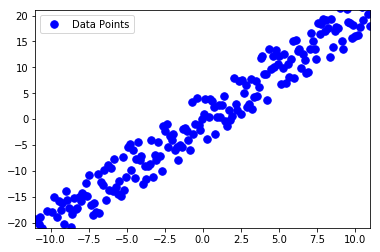

In [2]:
R = 2
x_a = np.linspace(-11,11,200)
y_a = R*x_a + (np.random.rand(len(x_a))-0.5)*10
fig = plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_a,y_a, '.b', markersize=15)
ax.legend(['Data Points'])

Let's calculate a polynomial approximation of the above device.

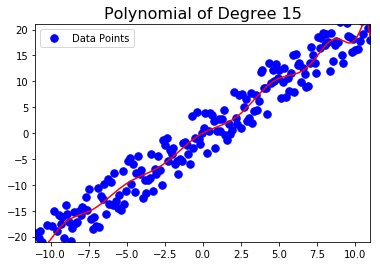

In [12]:
# Play around with the degree here to try and fit different degree polynomials
degree=15
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_a_,y_a_=poly_curve(p_a,x_a)
ax.plot(x_a,y_a,'.b',markersize=15)
ax.plot(x_a_, y_a_, 'r')
ax.legend(['Data Points'])
plt.title('Polynomial of Degree %d' %(len(p_a)-1),fontsize=16)

### Part (b)

In [14]:
def cost(x, y, start, end):
    """Given a set of x and y points, this function 
    calculates polynomial approximations of varying 
    degrees from start to end and returns the cost 
    of each degree in an array. The calculated cost 
    should be the mean square error."""
    c = []
    for degree in range(start, end):
        R = 2
        x_a = np.linspace(-11,11,200)
        y_a = R*x_a + (np.random.rand(len(x_a))-0.5)*10
        D_a = data_matrix(x_a,degree)
        p_a = leastSquares(D_a, y_a)
        c.append(p_a*p_a - degree*degree)
    return c

ValueError: setting an array element with a sequence.

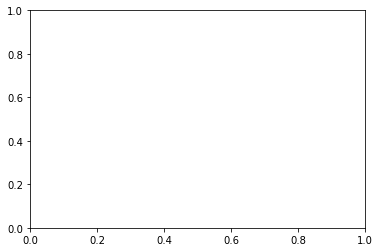

In [15]:
start = 1
end = 15
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start, end), cost(x_a,y_a,start,end))
plt.title('Cost vs. Degree')

### Part (c)

In [27]:
def improvedCost(x, y, x_test, y_test, start, end):
    """Given a set of x and y points training points, 
    this function calculates polynomial approximations of varying 
    degrees from start to end. Then it returns the cost, with 
    the polynomial tested on test points of each degree in an array"""
    c = []
    for degree in range(start, end):
        c.append(degree)
    return c

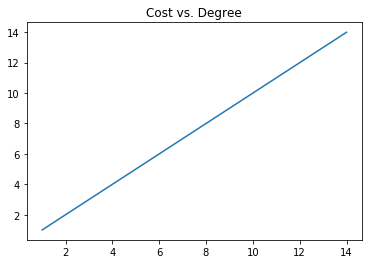

In [28]:
# Run this to test your new cost function
start = 1
end = 15
x_a_test = x_a[0::2]
x_a_training = x_a[1::2]
y_a_test = y_a[0::2]
y_a_training = y_a[1::2]
c = improvedCost(x_a_training, y_a_training, x_a_test, y_a_test, start, end)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start,end), c)
plt.title('Cost vs. Degree')

### Part (d)

200


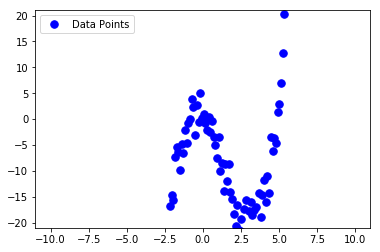

In [29]:
x_d_par=np.array([0.1,-4,-4,1])
x_d=np.linspace(-11,11,200)
y_d=np.dot(data_matrix(x_d,3),x_d_par)+(np.random.rand(len(x_d))-0.5)*10

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_d,y_d,'.b',markersize=15)
ax.legend(['Data Points'])
print(len(x_d))

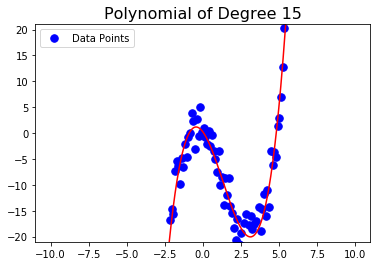

In [30]:
# Play With the degree to try to fit different degree polynomials
degree=15
D_d = data_matrix(x_d,degree)
p_d = leastSquares(D_d, y_d)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_d_,y_d_=poly_curve(p_d,x_d)
ax.plot(x_d,y_d,'.b',markersize=15)
ax.plot(x_d_, y_d_, 'r')
ax.legend(['Data Points'])
plt.title('Polynomial of Degree %d' %(len(p_d)-1),fontsize=16)

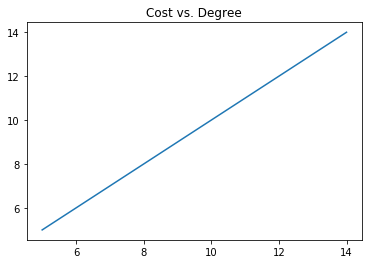

In [31]:
start = 5
end = 15
x_d_test = x_d[0::2]
x_d_training = x_d[1::2]
y_d_test = y_d[0::2]
y_d_training = y_d[1::2]
c = improvedCost(x_d_training, y_d_training, x_d_test, y_d_test, start, end)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start,end), c)
plt.title('Cost vs. Degree')

### Part (e)

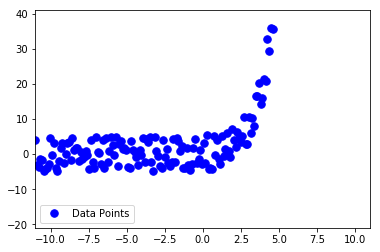

In [32]:
x_e=np.linspace(-11,11,200)
y_e=0.4*np.exp(x_e)+(np.random.rand(len(x_e))-0.5)*10

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,41])
ax.plot(x_e,y_e,'.b',markersize=15)
ax.legend(['Data Points'])

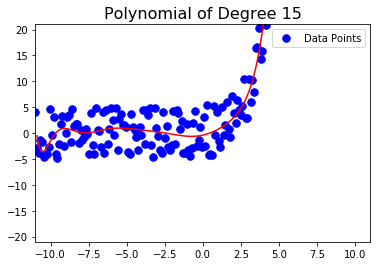

In [33]:
# Play With the degree to try to fit different degree polynomials
degree=15
D_e = data_matrix(x_e,degree)
p_e = leastSquares(D_e, y_e)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_e_,y_e_=poly_curve(p_e,x_e)
ax.plot(x_e,y_e,'.b',markersize=15)
ax.plot(x_e_, y_e_, 'r')
ax.legend(['Data Points'])
plt.title('Polynomial of Degree %d' %(len(p_e)-1),fontsize=16)

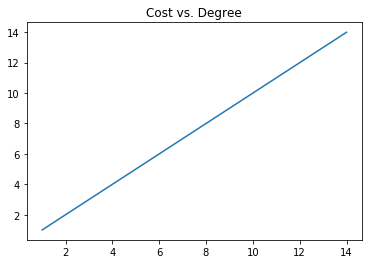

In [34]:
start = 1
end = 15
x_e_test = x_e[0::2]
x_e_training = x_e[1::2]
y_e_test = y_e[0::2]
y_e_training = y_e[1::2]
c = improvedCost(x_e_training, y_e_training, x_e_test, y_e_test, start, end)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start,end), c)
plt.title('Cost vs. Degree')

## Question 3: Sparse Imaging

This example generates a sparse signal and tries to recover it using the Orthogonal Matching Pursuit algorithm.

In [35]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
from simulator import *
%matplotlib inline

In [36]:
measurements, A = simulate()

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
sparsity = 476
numPixels = len(A[0])

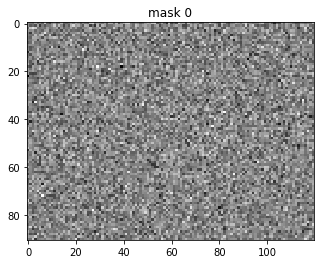

In [37]:
# CHOOSE DIFFERENT MASKS TO PLOT
chosenMaskToDisplay = 0

M0 = A[chosenMaskToDisplay].reshape((height,width))
plt.title('mask %d'%chosenMaskToDisplay)
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

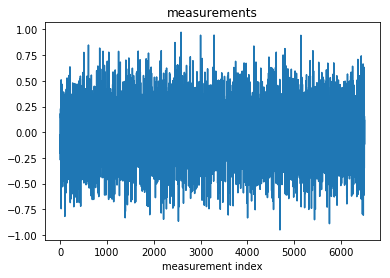

In [38]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [39]:
# OMP algorithm
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
        # Calculate the correlations
        print('%d - '%i,end="",flush=True)
        corrs = A.T.dot(r)

        # Choose highest-correlated pixel location and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(COMPLETE_HERE))
        indices.append(best_index)

        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:,COMPLETE_HERE]

        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        # COMPLETE THE LINE BELOW
        xhat = np.linalg.lstsq(COMPLETE_HERE, COMPLETE_HERE)[0]  

        # Find component orthogonal to subspace to use for next measurement
        # COMPLETE THE LINE BELOW
        r = b - Atrunc.dot(COMPLETE_HERE)

        # This is for viewing the recovery process
        if i % 10 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

In [40]:
rec = OMP((height,width), sparsity, measurements, A)

0 - 

NameError: name 'COMPLETE_HERE' is not defined

### PRACTICE: Part (c)

In [ ]:
# the setting

# file name for the sparse image
fname = 'figures/smiley.png'
# number of measurements to be taken from the sparse image
numMeasurements = 6500
# the sparsity of the image
sparsity = 400

# read the image in black and white
I = misc.imread(fname, flatten=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [ ]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

In [ ]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [ ]:
rec = OMP(imageShape, sparsity, measurements, A)

## Question 4: Speeding Up OMP

This example generates a sparse signal and tries to recover it using the Orthogonal Matching Pursuit algorithm.

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
from simulator import *
%matplotlib inline

In [ ]:
# the setting

# file name for the sparse image
fname = 'figures/pika.png'
# number of measurements to be taken from the sparse image
numMeasurements = 9000
# the sparsity of the image
sparsity = 800

# read the image in black and white
I = misc.imread(fname, flatten=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [ ]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

In [ ]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [ ]:
# Write a function that returns a matrix U whose columns form
# an orthonormal basis for the columns of the matrix A.
def gramschmidt(A):
    return U

# A better option is to write a function that takes in a matrix U0
# with orthonormal columns and a single new vector v and adds another
# orthonormal column to U0 creating a new matrix U whose columns are orthonormal
# and span the column space of {U0, v}.
# Note: Using this function will make your code faster.
def gramschmidt_addone(U0, v):
    return U

In [ ]:
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    ########################################
    ### THIS LINE INITIALIZES THE MATRIX U
    U = np.zeros([np.size(A,0),0])
    ########################################
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
        # calculate the correlations
        print('%d - '%i,end="",flush=True)
        corrs = A.T.dot(r)

        # Choose highest-correlated pixel location and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(COMPLETE_HERE))
        
        ###########################
        ### MODIFY THIS SECTION ###
        ## TO USE GRAM-SCHMIDT  ###
        ###########################
                
        indices.append(best_index)
        
        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:,COMPLETE_HERE]
        
        #############################
        ## CHOOSE ONE OF THESE LINES
        U = gramschmidt(Atrunc)
        ### OR
        v = A[:,best_index]
        U = gramschmidt_addone(U,v)
        #############################
        
        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        
        ###################################
        ## COMPLETE THE LINES BELOW AND
        ## REWRITE THESE LINES USING GRAMSCHMIDT TO SPEED UP LEAST SQUARES
        xhat = np.linalg.lstsq(COMPLETE_HERE, COMPLETE_HERE)[0]  
        r = b - Atrunc.dot(COMPLETE_HERE)
        ####################################
        
        # Find component orthogonal to subspace to use for next measurement
        ## CHANGE THIS LINE        
        
        ###########################
        ### ------------------- ###
        ###########################
        
        # This is for viewing the recovery process
        if i % 100 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            
            # RECOVERING xhat for plotting
            xhat = np.dot(np.linalg.inv(np.dot(Atrunc.T,Atrunc)),np.dot(Atrunc.T,b-r))
            
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

In [ ]:
rec = OMP(imageShape, sparsity, measurements, A)

## (PRACTICE) Question 6: Perceptron Valley

In [21]:
%matplotlib inline

import numpy as np
import numpy.random as npr
import time, sys
from IPython.display import clear_output
from IPython.display import display
import matplotlib.pyplot as plt

### Part (e)

Fill in the missing lines of code in the following function definition to implement the PLA. The update is given below.
<br>
**if** $\text{sign}\left(\langle\vec{w}_j, \, \vec{x_i}\rangle\right) \neq y_i$
<br>
$\;\;\;\;\; \vec{w}_{j+1} \gets \vec{w}_j + y_i \vec{x_i}$
<br>
**else**
<br>
$\;\;\;\;\; \vec{w}_{j+1} \gets \vec{w}_j$
<br>
**end if**

In [22]:
def PLA(X,y,w_0,J,ax):
    n = len(y)
    w_j = w_0
    for j in range(J):
        i = npr.randint(0,n-1)
        x_i = X[:,i]
        y_i = y[i]
        
        # YOUR CODE HERE
        
        plotHyperplane(ax,X,y,i,j,w_j)
    w_J = w_j
    return w_J

In [23]:
def plotHyperplane(ax,X,y,i,j,w_j):
    ma = 1.1*max(abs(np.concatenate((X[0,:],X[1,:]))))
    ax.axis('equal')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.plot(X[0,y==1],X[1,y==1],'r+')
    ax.plot(X[0,y==-1],X[1,y==-1],'bx')
    if y[i] == 1:
        ax.plot(X[0,i],X[1,i],'k+')
    else:
        ax.plot(X[0,i],X[1,i],'kx')
    ax.arrow(0,0,w_j[0],w_j[1],head_width=0.1,head_length=0.1,fc='k',ec='k')
    ax.arrow(0,0,-100*w_j[1],100*w_j[0],head_width=0.1,head_length=0.1,fc='g',ec='g')
    ax.arrow(0,0,100*w_j[1],-100*w_j[0],head_width=0.1,head_length=0.1,fc='g',ec='g')
    ax.axis((-ma,ma,-ma,ma))
    ax.set_title('Iteration {}: training error = {}'.format(j,trainingError(X,y,w_j)))
    time.sleep(0.1)
    clear_output(True)
    display(fg)
    ax.cla()

In [24]:
def trainingError(X,y,w_j):
    n = len(y)
    y_p = np.sign(np.dot(X.T,w_j))
    return float(np.sum(y_p!=y)) / float(n) 

In [25]:
# Generate data points
n = 100
d = 2
X = np.concatenate((npr.normal(1,0.5,(d,np.int(n/2))),npr.normal(-1,1,(d,np.int(n/2)))),axis=1)
y = np.concatenate((np.ones(np.int(n/2)),-np.ones(np.int(n/2))))

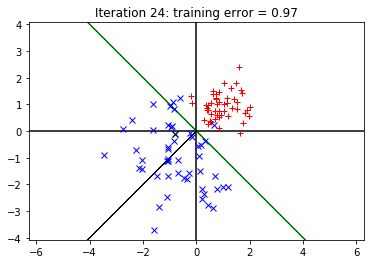

In [26]:
# Run PLA and watch it learn
w_0 = np.array([-5,-5])
J = 25
fg, ax = plt.subplots()
w_J = PLA(X,y,w_0,J,ax)
plt.close()